In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

def plot_model_performance(filename, add_to_loss=0, resume_points=[]):
    
    def add_resume_learning_lines(ax):
        for resume_pt in resume_points:
            ax.axvline(x=resume_pt, color='r', ls='--', alpha=0.3)
            
    with open(filename) as f:
        content = f.readlines()
    
    logs = []
    for line in content:
        if line.startswith('#'):
            print(line.strip())
        if '/step -' in line:
            information = line.split('/step -')[1]
            log = {}
            for measurement in information.split(' - '):
                key, value = measurement.strip().split(':')
                value = float(value)
                log[key] = value
            logs.append(log)      
            
    df_logs = pd.DataFrame(logs)
    df_logs['epoch'] = np.array(df_logs.index) + 1
    df_logs['loss'] = df_logs['loss'] + add_to_loss
    df_logs['val_loss'] = df_logs['val_loss'] + add_to_loss
    df_logs = df_logs.set_index('epoch')
    df_logs.head()
    
    fig, axes = plt.subplots(figsize=(12, 12), ncols=1, nrows=2)
    yrange = (-0.05, 1.05)

    ax = axes.flatten()[0]
    df_logs['loss'].plot(ax=ax)
    df_logs['val_loss'].plot(ax=ax)
    add_resume_learning_lines(ax)
    ax.set_title('Model Loss', fontsize=14)
    ax.legend()
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_ylim(yrange)
    
    ax = axes.flatten()[1]
    df_logs['dice_coef'].plot(ax=ax)
    df_logs['jacc_coef'].plot(ax=ax)
    add_resume_learning_lines(ax)
    ax.set_title('Model Performance (Dice vs Jaccard)', fontsize=14)
    ax.legend()
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_ylim(yrange)  
    
    plt.show()

###############################################################################
### optimizer       = SGD(lr=0.03, momentum=0.4, decay=0.0, nesterov=False)
### loss            = jacc_coef
### batch_size      = 128
### Resume Learning = True
### Learning Rate   =    0.03,   0.015,   0.015,   0.015,   0.015,   0.015,
### Momentum        =     0.4,    0.45,    0.45,    0.45,    0.45,    0.45,
### dropout         =     0.1,    0.05,    0.05,    0.05,    0.05,    0.05,
### epochs          =     100,     100,     100,     100,     100,     100,
### best            = 0.13699, 0.38844, 0.48507, 0.54015, 0.58077,
###############################################################################


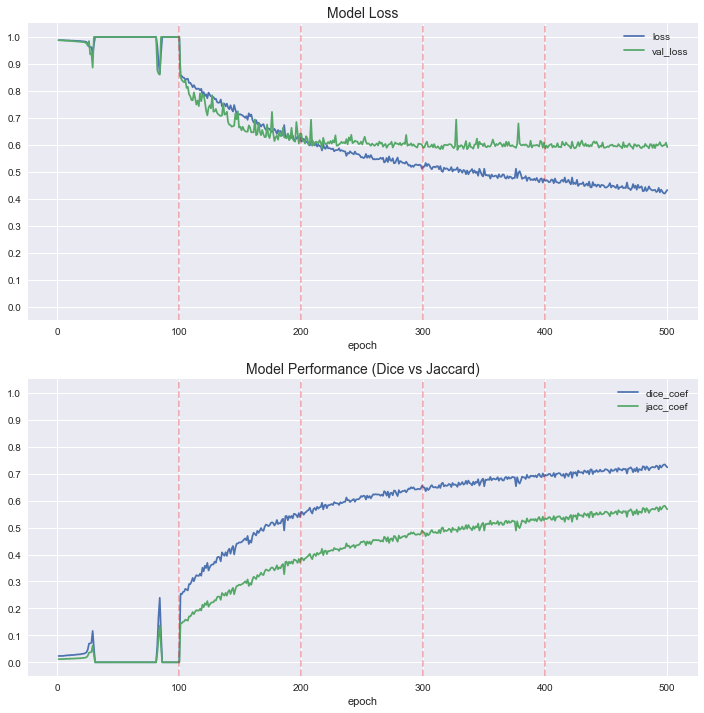

In [2]:
filename = 'training_logs_local.txt'
plot_model_performance(filename, add_to_loss=1, resume_points=[100, 200, 300, 400])